In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax

In [2]:
t = 0
T = 8                       # Final time
dt = 1 / 1600                 # Time step size
num_steps = int(T / dt)

nominal_mu = 0.001
rho_ = 1
mu_list = [nominal_mu*0.999, nominal_mu*1.001, nominal_mu*0.995, nominal_mu*1.005, nominal_mu*0.99, nominal_mu*1.01, nominal_mu]
names = ["mu_n0.001", "mu_p0.001", "mu_n0.005", "mu_p0.005", "mu_n0.01", "mu_p0.01", "mu_nominal"]

In [3]:
# 4 to 5 seconds
ss_timestep_size = int((5 - 4) / dt /200)
print(ss_timestep_size)

num_time_steps_ss = 200

8


In [7]:
from pathlib import Path


ss_list = []

for i in range(len(mu_list)):
    folder = Path(f"/data1/jy384/research/Data/UnimodalSROB/results/bp_mu_{names[i]}_rho_{rho_}/")
    ss_file = Path(f"/data1/jy384/research/Data/UnimodalSROB/results/bp_mu_{names[i]}_rho_{rho_}/snapshots_mu_{names[i]}_rho_{rho_}.npz")
    
    # load npz file
    ss = np.load(ss_file)
    ss_list.append(ss)      

In [8]:
ss_list[-1]['u'].shape

(200, 15168)

S =  [1458.31484283  102.02809532   95.58066535   44.08400515   20.49398149]
eigvals_SVD = 
 [1.06868451e+04 5.23102122e+01 4.59078572e+01 9.76582668e+00]
idx =  8
rel_err_SVD[idx] =  9.913072038103543e-05
S =  [1.43425230e+03 2.03273511e+01 7.00030552e-01 5.04387915e-02
 3.56281641e-03]
eigvals_SVD = 
 [1.03370837e+04 2.07638795e+00 2.46252650e-03 1.27842799e-05]
idx =  1
rel_err_SVD[idx] =  2.394174206665767e-07
S =  [1458.20837283  104.01686373   97.60042582   45.67460699   20.96628634]
eigvals_SVD = 
 [1.06852847e+04 5.43693866e+01 4.78685584e+01 1.04832649e+01]
idx =  9
rel_err_SVD[idx] =  6.763676931842433e-05
S =  [1.43429332e+03 2.01657985e+01 6.98686079e-01 4.96595436e-02
 3.36764921e-03]
eigvals_SVD = 
 [1.03376750e+04 2.04351471e+00 2.45307656e-03 1.23923129e-05]
idx =  1
rel_err_SVD[idx] =  2.384519641740468e-07
S =  [1458.07115319  106.49248065  100.12490374   47.66405231   21.54801651]
eigvals_SVD = 
 [10683.27380783    56.98818309    50.37686608    11.41639137]
idx =  9


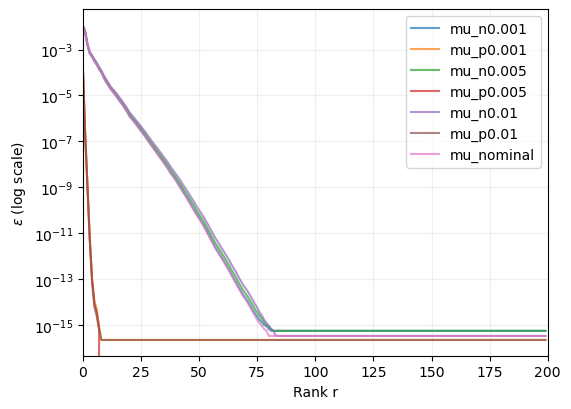

In [10]:
rob_lst = []
ss_u_lst = []
rel_err_SVD_lst = []

# plot the rel error function
fig, ax = plt.subplots(figsize=(6, 4.5))
for i in range(len(mu_list)):
    
    # if i == len(filepath_FOMs):
        
    #     # plot the rel error function
    #     rel_err_SVD = 1 - (np.cumsum(S**2) / np.sum(S**2))
        
    #         # print the first idx when it is less than 1e-4
    #     idx = np.where(rel_err_SVD < 1e-4)[0][0]
    #     print("idx = ", idx)
    #     print("rel_err_SVD[idx] = ", rel_err_SVD[idx])
        
    #     ax.plot(rel_err_SVD, label="Global", linestyle='--', alpha=0.7)
    #     ax.set_yscale('log')
    #     ax.set_ylabel("$\epsilon$ (log scale)")
    #     # set limit
    #     ax.set_xlim([0, 500])
    #     # ax.set_ylim([1e-13, 1e-3])
    #     # show grid
    #     ax.grid(True, alpha=0.2)
    #     ax.set_xlabel("Rank r")
    #     ax.legend()
    
    # else:
    #     ax.plot(rel_err_SVD_lst[i], label=filepath_FOMs[i], linestyle='-', alpha=0.7)
    #     ax.set_yscale('log')
    #     ax.set_ylabel("$\epsilon$ (log scale)")
    #     # set limit
    #     ax.set_xlim([0, 500])
    #     # ax.set_ylim([1e-13, 1e-3])
    #     # show grid
    #     ax.grid(True, alpha=0.2)
    #     ax.set_xlabel("Rank r")
    #     ax.legend()
        # Calculate the covariance matrix
    ss_u = ss_list[i]['u']
    # print(ss_q_dis.shape)

    # svd
    U, S, V = np.linalg.svd(ss_u)
    print("S = ", S[:5])
    eigvals_SVD = S**2 * (1 / (num_time_steps_ss-1))
    print("eigvals_SVD = \n", eigvals_SVD[:4])
    # append U
    # print("U = ", U.shape)
    rob_lst.append(U)
    ss_u_lst.append(ss_u)

    # # lets plot the eigenvalues
    rel_err_SVD = 1 - (np.cumsum(eigvals_SVD) / np.sum(eigvals_SVD))
    rel_err_SVD_lst.append(rel_err_SVD)
    # print("rel_err_SVD = \n", rel_err_SVD[:4])

    # print the first idx when it is less than 1e-4
    idx = np.where(rel_err_SVD < 1e-4)[0][0]
    print("idx = ", idx)
    print("rel_err_SVD[idx] = ", rel_err_SVD[idx])
    
    
    ax.plot(rel_err_SVD_lst[i], label=names[i], linestyle='-', alpha=0.7)
    ax.set_yscale('log')
    ax.set_ylabel("$\epsilon$ (log scale)")
    # set limit
    ax.set_xlim([0, 200])
    # ax.set_ylim([1e-13, 1e-3])
    # show grid
    ax.grid(True, alpha=0.2)
    ax.set_xlabel("Rank r")
    ax.legend()


In [11]:
# save snapshot matrix as .mat file
import scipy.io

ss_folder = Path(f"/data1/jy384/research/Data/UnimodalSROB/snapshots/")
for i in range(len(mu_list)):
    scipy.io.savemat(f"{ss_folder}/snapshots_mu_{names[i]}_rho_{rho_}.mat", {'snapshots': ss_u_lst[i]})

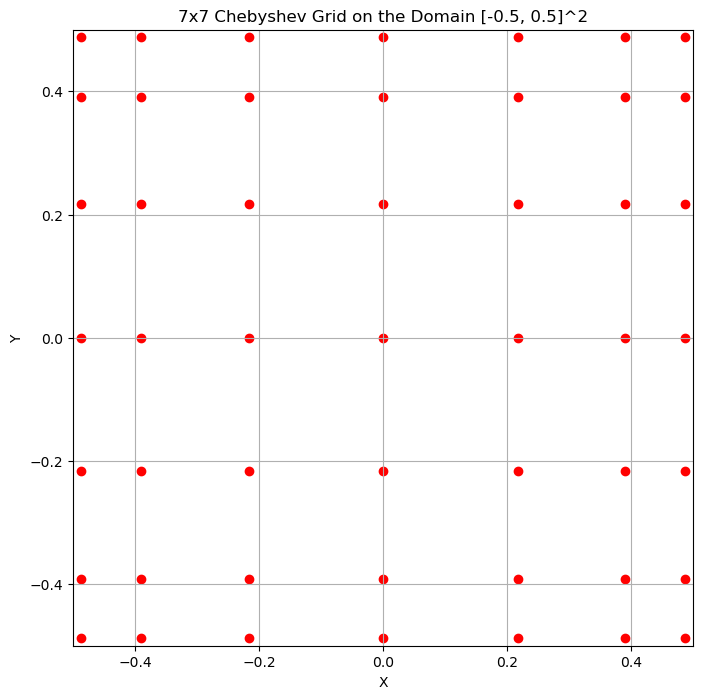

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import Chebyshev

def chebyshev_sampling(n, interval=(-1, 1)):
    # Generate Chebyshev roots for a polynomial of degree n
    roots = Chebyshev.basis(n).roots()

    # Scale the roots to the desired interval
    a, b = interval
    scaled_roots = 0.5 * (b - a) * roots + 0.5 * (b + a)

    return scaled_roots

# Generate a 7x7 Chebyshev grid in the domain [-0.5, 0.5]^2
n_samples = 7
interval = (-0.5, 0.5)

points_x = chebyshev_sampling(n_samples, interval)
points_y = chebyshev_sampling(n_samples, interval)

X, Y = np.meshgrid(points_x, points_y)

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(X, Y, color='red')
plt.title('7x7 Chebyshev Grid on the Domain [-0.5, 0.5]^2')
plt.grid(True)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [ ]:
# # save the ROBs 
# for i in range(len(mu_list)):
#     np.savez(f"/data1/jy384/research/Data/UnimodalSROB/ROB/ROB_mu_{mu_list[i]}_rho_{rho_}.npz", rob=rob_lst[i])